# Data visualisation

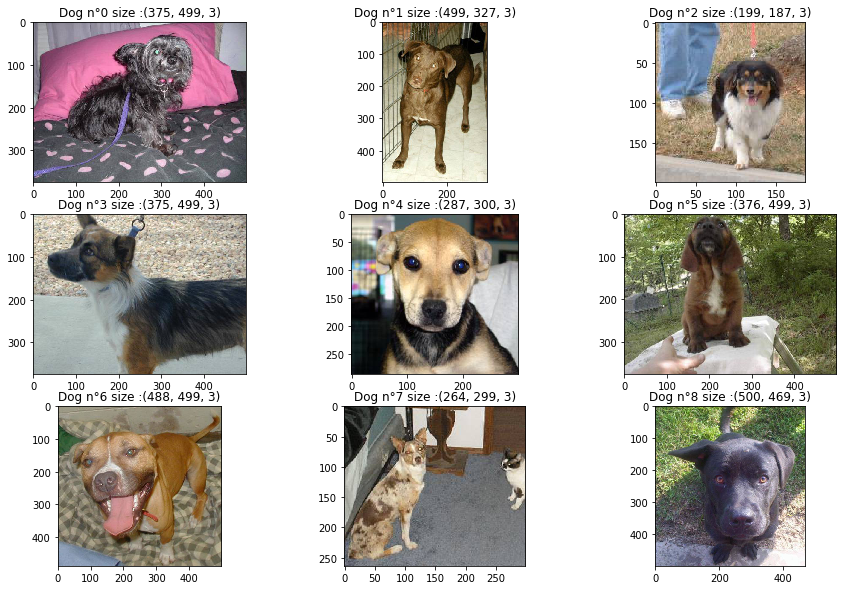

In [1]:
# plot dog photos from the dogs vs cats dataset
%matplotlib inline
from matplotlib import pyplot as plt 
plt.rcParams['figure.figsize']=[15,10]
import cv2
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(3,3,1 + i)
    # define filename
    filename =folder+'dog.' + str(i) + '.jpg'
    # load image pixels
    image = cv2.imread(filename)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    # plot raw pixel data
    plt.imshow(image)
    plt.title(f"Dog n°{i} size :{image.shape}")
# show the figure
plt.show()


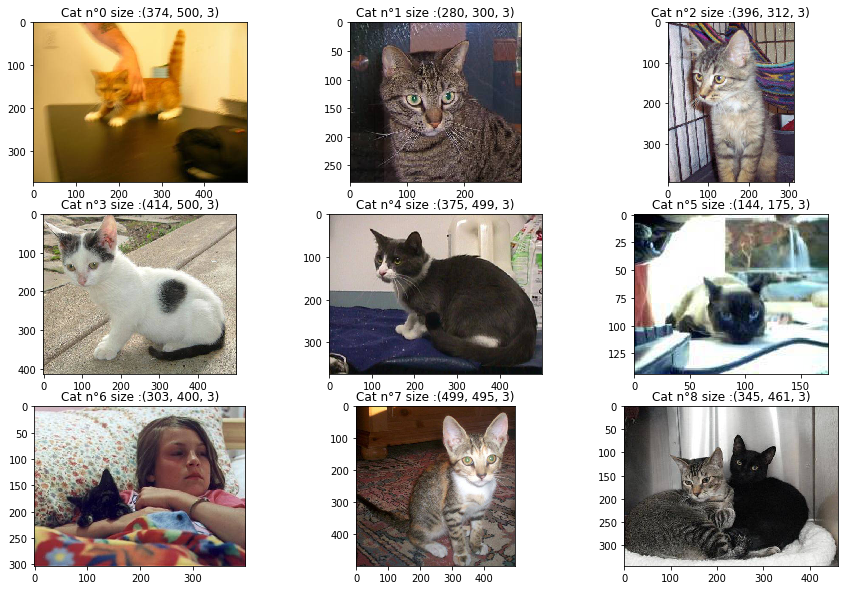

In [2]:
# plot dog photos from the dogs vs cats dataset
%matplotlib inline
from matplotlib import pyplot as plt 
plt.rcParams['figure.figsize']=[15,10]
import cv2
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(3,3,1 + i)
    # define filename
    filename =folder+'cat.' + str(i) + '.jpg'
    # load image pixels
    image = cv2.imread(filename)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    # plot raw pixel data
    plt.imshow(image)
    plt.title(f"Cat n°{i} size :{image.shape}")
# show the figure
plt.show()


# Pre-Process Photos into Standard Directories

In [3]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

# CNN Model

In [4]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("../Dogs-and-Cats-CNN-Classification-Kaggle"))

Using TensorFlow backend.


['model.h5', 'train', 'test', 'Dogs and Cats CNN Classification Kaggle.ipynb', 'sample_submission.csv', 'test.py', 'README.md', '.git', 'dataset_dogs_vs_cats', 'dogs-vs-cats-redux-kernels-edition.zip', '.ipynb_checkpoints', 'submission.csv']


In [5]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Preparing training data

In [6]:
filenames = os.listdir("../Dogs-and-Cats-CNN-Classification-Kaggle/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


In [7]:
df.head()

,filename,category
0,cat.11684.jpg,0
1,dog.7229.jpg,1
2,cat.9682.jpg,0
3,dog.1834.jpg,1
4,cat.8806.jpg,0


In [8]:
df.tail()

,filename,category
24995,dog.581.jpg,1
24996,cat.11386.jpg,0
24997,dog.205.jpg,1
24998,dog.11158.jpg,1
24999,cat.10448.jpg,0


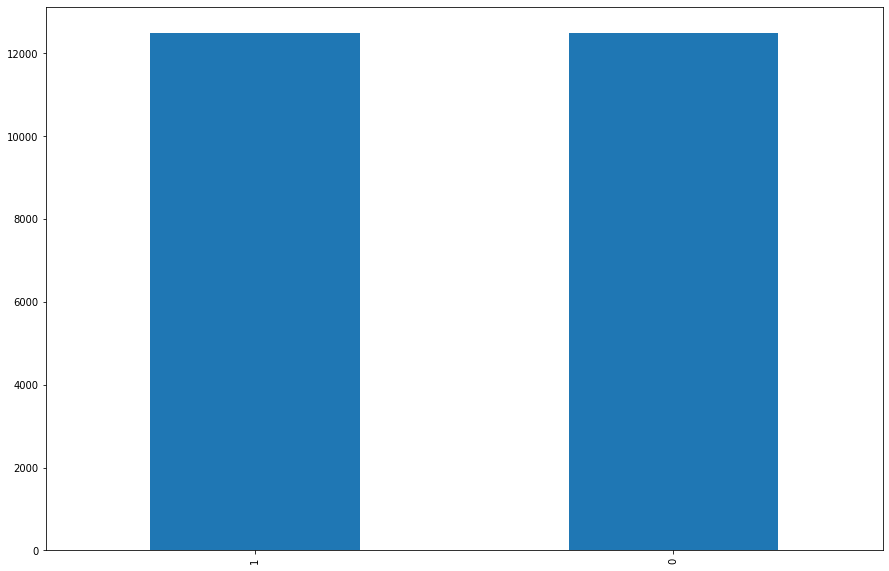

In [9]:
df['category'].value_counts().plot.bar()

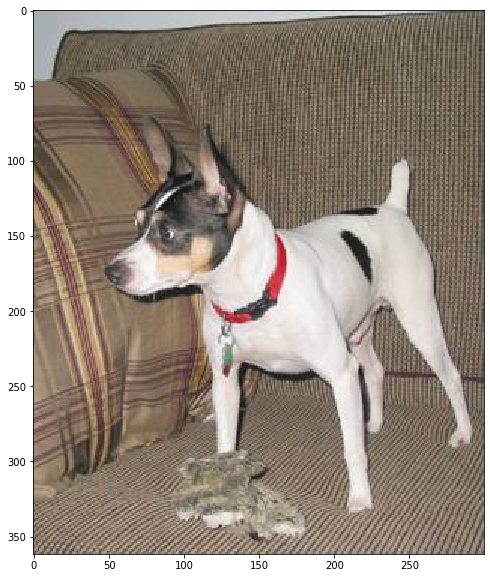

In [10]:
sample = random.choice(filenames)
image = load_img("../Dogs-and-Cats-CNN-Classification-Kaggle/train/"+sample)
plt.imshow(image)

# Build model

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

W0911 19:56:24.451192 139680666498880 deprecation_wrapper.py:119] From /home/prembamrung/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0911 19:56:24.460937 139680666498880 deprecation_wrapper.py:119] From /home/prembamrung/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 19:56:24.462749 139680666498880 deprecation_wrapper.py:119] From /home/prembamrung/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0911 19:56:24.480795 139680666498880 deprecation_wrapper.py:119] From /home/prembamrung/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]


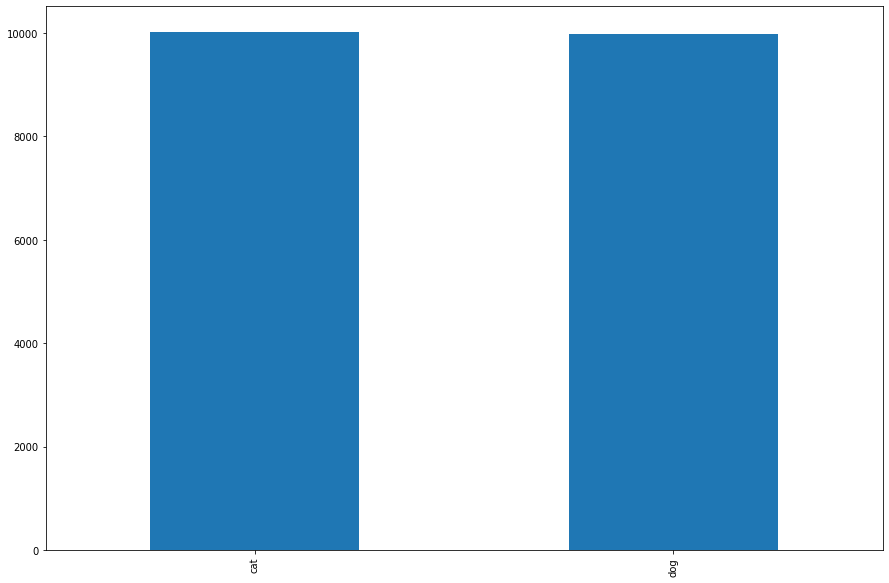

In [13]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
train_df['category'].value_counts().plot.bar()

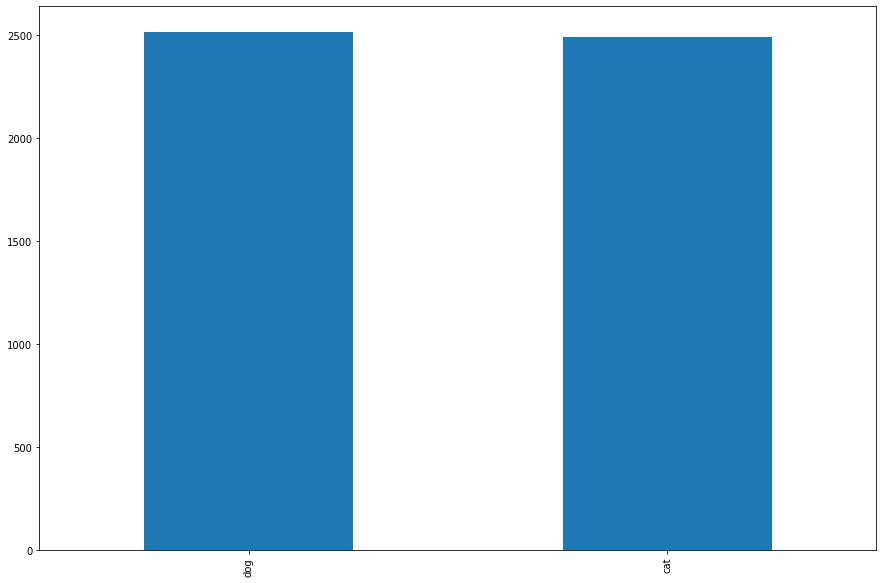

In [14]:
validate_df['category'].value_counts().plot.bar()

In [15]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

# Training Generator

In [16]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../Dogs-and-Cats-CNN-Classification-Kaggle/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


# Validation Generator

In [17]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../Dogs-and-Cats-CNN-Classification-Kaggle/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


# Exemple Generator

Found 1 validated image filenames belonging to 1 classes.


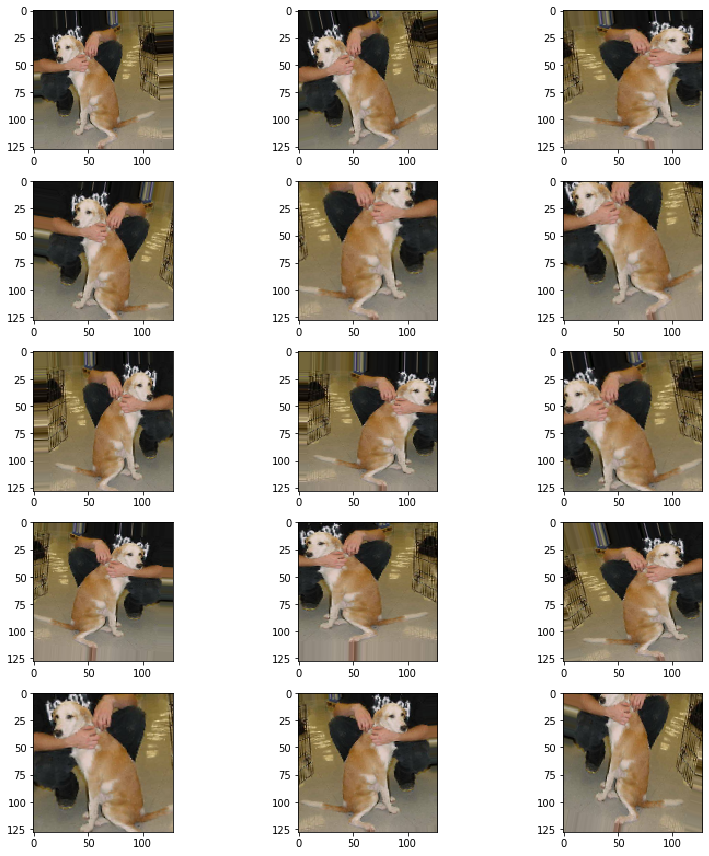

In [18]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../Dogs-and-Cats-CNN-Classification-Kaggle/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Fit Model

In [19]:
#FAST_RUN= True
epochs=5 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

W0911 19:56:38.731331 139680666498880 deprecation.py:323] From /home/prembamrung/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
1333/1333 [==============================] - 96s 72ms/step - loss: 0.7634 - acc: 0.6268 - val_loss: 0.7938 - val_acc: 0.5964
Epoch 2/50
1333/1333 [==============================] - 93s 70ms/step - loss: 0.5722 - acc: 0.7108 - val_loss: 0.5480 - val_acc: 0.7218
Epoch 3/50
1333/1333 [==============================] - 93s 70ms/step - loss: 0.5196 - acc: 0.7511 - val_loss: 0.7595 - val_acc: 0.6919
Epoch 4/50
1333/1333 [==============================] - 94s 70ms/step - loss: 0.4782 - acc: 0.7799 - val_loss: 0.4093 - val_acc: 0.8261
Epoch 5/50
1333/1333 [==============================] - 94s 70ms/step - loss: 0.4514 - acc: 0.7907 - val_loss: 0.4209 - val_acc: 0.8100
Epoch 6/50
1333/1333 [==============================] - 94s 70ms/step - loss: 0.4315 - acc: 0.8035 - val_loss: 0.4337 - val_acc: 0.7928

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/50
1333/1333 [==============================] - 94s 70ms/step - loss: 0.3842 - acc: 0.8285 - va

# Save model

In [29]:
model.save("model.h5")

# Visualize Training

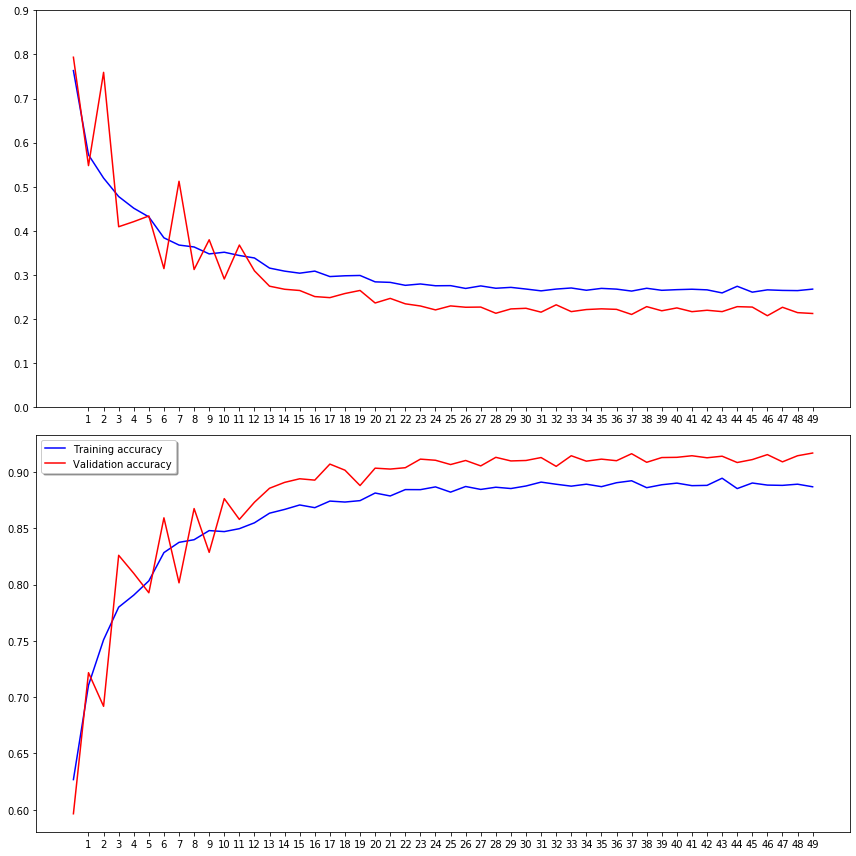

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [22]:
test_filenames = os.listdir("../Dogs-and-Cats-CNN-Classification-Kaggle/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

# Create Testing Generator

In [23]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../Dogs-and-Cats-CNN-Classification-Kaggle/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 12500 validated image filenames.


# Predict

In [24]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })


# Visualize Result

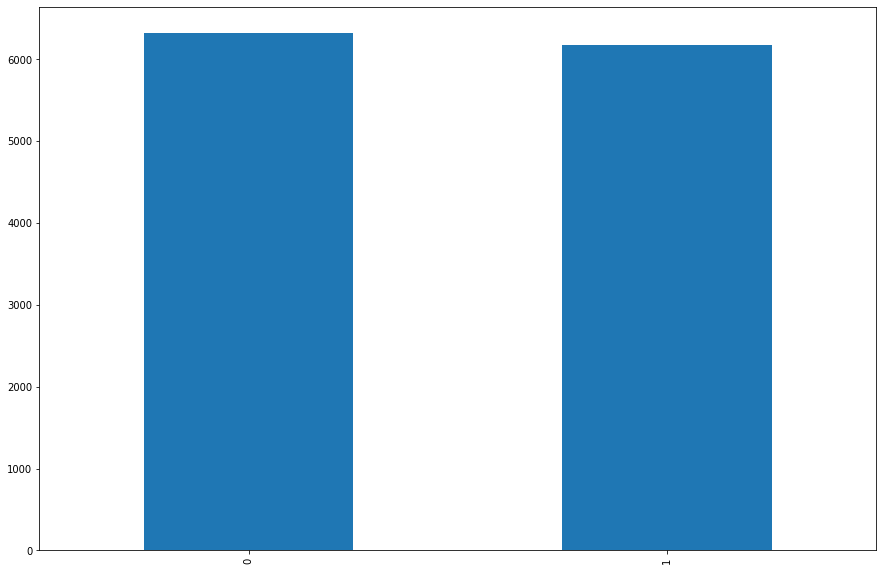

In [25]:
test_df['category'].value_counts().plot.bar()

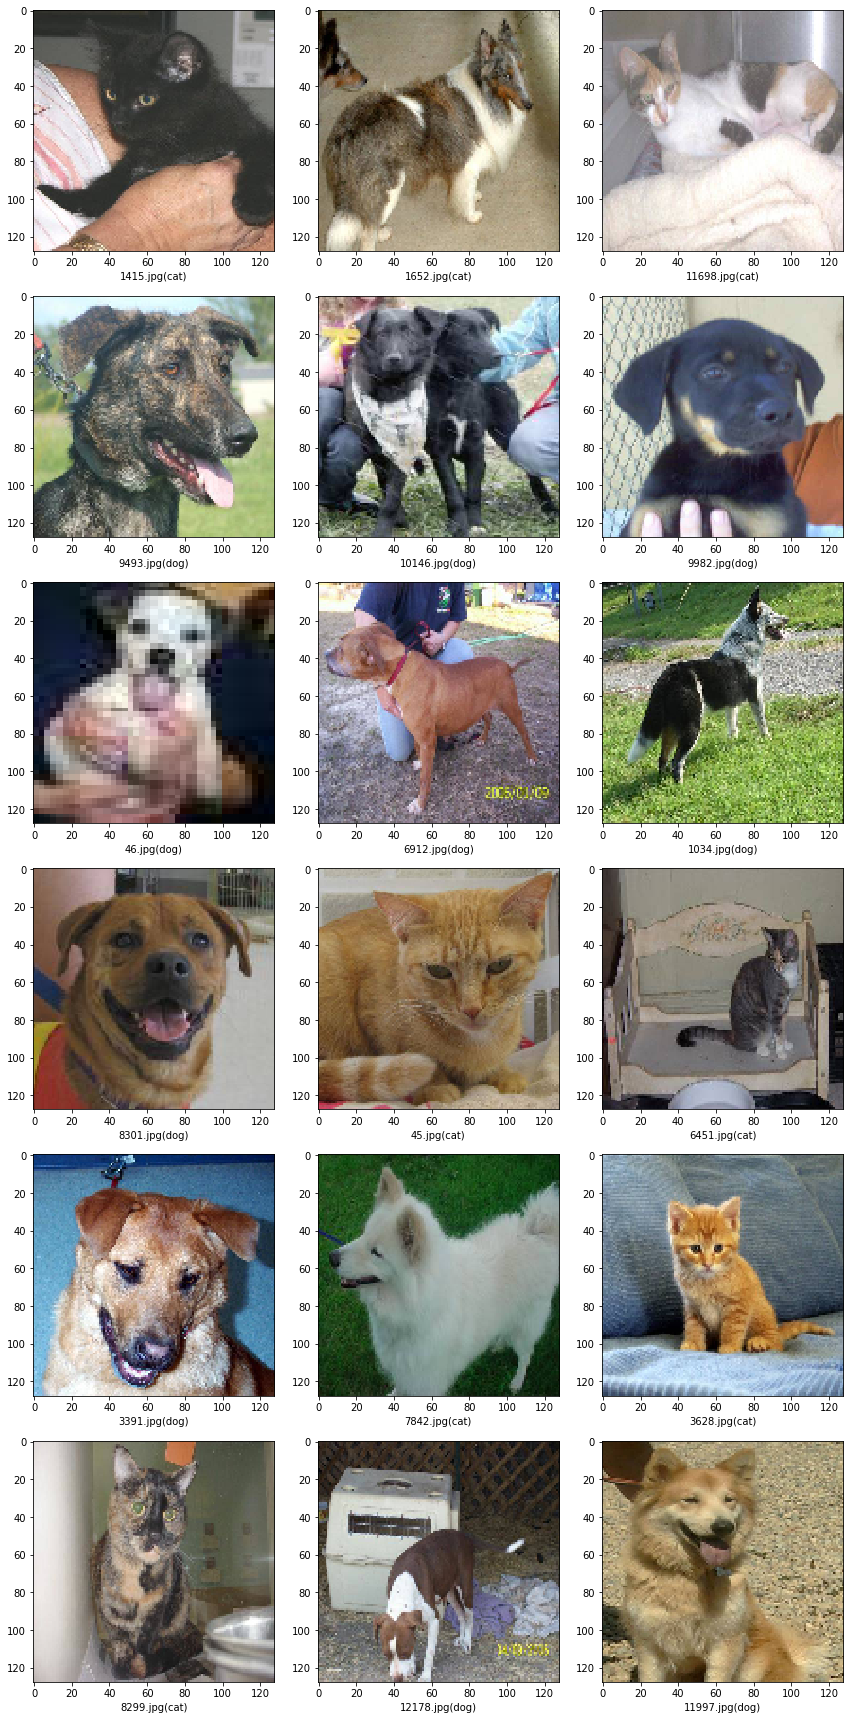

In [28]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../Dogs-and-Cats-CNN-Classification-Kaggle/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    if category==1:
        animal="dog"
    else:
        animal="cat"
    plt.xlabel(filename + '(' + "{}".format(animal) + ')' )
plt.tight_layout()
plt.show()

# Submission

In [36]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)

In [25]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1905215763653581053
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3094955013536478275
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5353635840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3428410585136095044
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9323395808573589516
physical_device_desc: "device: XLA_GPU device"
]


In [39]:
def limit_mem():
    K.get_session().close()
    cfg = K.tf.ConfigProto()
    cfg.gpu_options.allow_growth = True
    K.set_session(K.tf.Session(config=cfg))
    
    limit_mem()

In [26]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [41]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 911202952428749790
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 608011358614739499
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5209522176
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2336107147022060419
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 9176100656894974095
physical_device_desc: "device: XLA_GPU device"
]


In [45]:
from keras.backend.tensorflow_backend import set_session
from keras.backend.tensorflow_backend import clear_session
from keras.backend.tensorflow_backend import get_session
import tensorflow
import gc

# Reset Keras Session
def reset_keras():
    sess = get_session()
    clear_session()
    sess.close()
    sess = get_session()

    try:
        del classifier # this is from global space - change this as you need
    except:
        pass

    print(gc.collect()) # if it's done something you should see a number being outputted

    # use the same config as you used to create the session
    config = tensorflow.ConfigProto()
    config.gpu_options.per_process_gpu_memory_fraction = 1
    config.gpu_options.visible_device_list = "0"
    set_session(tensorflow.Session(config=config))
    
reset_keras()

17982


In [46]:
from keras import backend as K
K.clear_session()